#Introduction to RxRx19 dataset

Today we will be familiarizing ourselves with the dataset structure, and performing a few operations to understand it better.

1. Loading the datasets

  The first step is to clone the repository with the data. The original dataset available on Kaggle has more than 305520 images, with total size of >400 GB. Hence, we create a subset of 16,000 images and their labels.

> If you are curious to know how we created this subset, you can check [here](https://github.com/ai4all-sfu/comp-biology-2020/blob/master/day0-data-preprocessing.ipynb).



In [ ]:
! git clone https://github.com/ai4all-sfu/comp-biology-2020.git

Cloning into 'comp-biology-2020'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 43 (delta 1), reused 10 (delta 1), pack-reused 32
Unpacking objects: 100% (43/43), done.


To check if the files are available, we use the code below. We should see two folders: 'sample_data' and 'comp-biology-2020'.

In [ ]:
!ls

comp-biology-2020  sample_data


Let us take a look at the structure of the dataset.

![alt text](https://drive.google.com/uc?id=14wlQF2nvj_V1_JuSNpikM4UXWFh3p_Nu)
RxRx19-images.zip consists of the image dataset. As discussed on the slides, two types of cells are being considered: HRCE and Vero cells. Each folder consists of cell images taken from 26 Plates. Each plate has ~26,000 images. Each cell site is passed through five channels, so each channel has ~5000 images. (Slide contains further discussion on how each channel is different from the other)

Let us take a look at the metadata and embeddings file. To reduce the size of the files, we saved them in pickle format. Let's unpickle them now.



In [ ]:
import pandas as pd
import pickle

embeddings = pd.read_pickle('comp-biology-2020/embeddings.pkl', compression = 'xz')
metadata = pd.read_pickle('comp-biology-2020/metadata.pkl', compression = 'xz')

#changing the index
embeddings.set_index('site_id', inplace=True)

Let us print the head of metadata.pkl so that we can understand what it contains.

In [ ]:
metadata.head()

,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc
105620,HRCE-1_24_AA20_2,HRCE-1_24_AA20,HRCE,HRCE-1,24,AA20,2,active,Topiramate,0.03
253832,HRCE-1_22_J44_4,HRCE-1_22_J44,HRCE,HRCE-1,22,J44,4,active,Oxyclozanide,0.30
236450,HRCE-1_17_H05_4,HRCE-1_17_H05,HRCE,HRCE-1,17,H05,4,active,norethindrone,0.10
304521,VERO-2_1_S39_4,VERO-2_1_S39,VERO,VERO-2,1,S39,4,active,Indinavir,3.00
129300,HRCE-2_13_F18_2,HRCE-2_13_F18,HRCE,HRCE-2,13,F18,2,active,fludarabine-phosphate,0.30


In the above result, 'well' refers to the cell under consideration. As we discussed, every cell is analyzed under 4 sites, and each site is analyzed under 5 different channels. Here, 'site_id' refers to the cell site under consideration. Every cell site has a unique site_id. The format of site_id is as follows: 'experiment_plate_well_site'. So each of these will have an image each for the five different channels. Let me put the comparison between them for your reference.

![alt text](https://drive.google.com/uc?id=1MhREWlcUghzmwiMMVz8GXU_p6zWZYonu)

'disease_condition' refers to whether the cell is infected with the SARS-CoV-2 virus or not. In the original 'metadata.csv' there were three disease conditions: Active SARS-CoV-2 (the cell has been infected with the virus), UV Inactivated SARS-CoV-2, and Mock (mock preparations of SARS-CoV-2 on cells). We combined the disease conditions 'UV Inactivated SARS-CoV-2' and 'Mock' into one class: 'Inactive' (because they are similar), so that we can consider two distinct classes in our classification task: 'Active' and 'Inactive'.

'treatment' refers to the drug that is used to treat the cell from the virus, 'treatment_conc' refers to the amount of concentration that the drug is used under. For an 'inactive' cell site, the value under 'treatment' and 'treatment_conc' will be NaN. 

Let us print embeddings.pkl and take a look at its head.

In [ ]:
embeddings.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,...,feature_984,feature_985,feature_986,feature_987,feature_988,feature_989,feature_990,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,feature_1000,feature_1001,feature_1002,feature_1003,feature_1004,feature_1005,feature_1006,feature_1007,feature_1008,feature_1009,feature_1010,feature_1011,feature_1012,feature_1013,feature_1014,feature_1015,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023
site_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
HRCE-1_10_AA08_1,2.297975,0.022587,0.195894,0.014781,-1.100471,0.098462,0.242965,0.199119,-0.567304,-0.227210,-2.230506,-0.949541,-0.047310,0.533605,-0.290319,-1.508357,0.161617,0.380366,0.146494,-0.108530,-0.873874,0.056584,0.491351,0.080825,-1.321582,0.298009,0.190170,-0.864164,0.351424,0.536975,1.282918,-0.110490,-1.274246,0.943124,-1.541825,0.065526,-1.234762,0.295345,-1.824088,1.225561,...,1.209590,-1.098585,0.753858,0.079735,0.000902,-0.457200,-0.152898,0.280296,-0.768077,0.315934,-0.388910,-0.073659,0.390859,0.923492,0.642634,0.143817,0.619918,0.375651,0.347446,-0.236212,1.128898,0.012419,-1.073843,-0.257170,-0.714517,0.858910,0.012951,-0.503524,-1.609319,1.182596,0.586100,0.781158,-1.187773,-1.368313,-1.659620,-0.020060,-0.498513,0.349791,-0.286453,-1.424416
HRCE-1_10_AA08_2,2.023117,0.055359,0.032669,-0.427921,-1.477027,0.555283,0.125149,0.024121,-0.310992,-0.035899,-2.317528,-0.571142,-0.190510,1.388795,-0.545442,-1.311690,0.067700,0.051449,0.281658,0.190968,-0.541562,0.122109,0.277549,-0.053468,-1.983142,0.453062,0.017778,-1.351487,0.600766,1.270639,1.074047,-0.062500,-1.360750,0.680048,-1.492564,0.104654,-1.461042,0.506609,-1.586523,1.265087,...,1.547907,-0.983013,0.355730,0.020508,0.567637,-0.209212,-0.159852,0.014123,-0.657308,0.370420,-0.908580,-0.119487,0.233618,0.823882,0.551085,-0.014573,1.159965,0.614649,0.434470,0.093707,1.066292,0.126574,-1.049656,-0.243583,-0.585675,0.663529,-0.127107,0.177727,-1.868272,1.141989,0.857226,0.687854,-1.667390,-1.059504,-1.597720,-0.335833,-0.643573,0.253038,0.145723,-1.794530
HRCE-1_10_AA10_4,2.725714,0.097124,-0.251666,-0.245772,-0.611061,0.599592,0.098196,-0.359271,0.068162,-0.497672,-3.052315,0.072557,-0.220570,1.304541,-0.715440,-1.105000,-0.044301,-0.332337,0.173031,-0.191583,-0.540964,0.216181,0.587202,0.116111,-2.598186,0.853636,0.094363,-1.360084,0.333956,1.175048,0.694695,0.102681,-1.562893,0.513190,-1.809038,-0.241688,-1.753975,0.535202,-0.929908,1.604326,...,1.424329,-0.640973,0.005899,0.005321,0.440640,-0.100642,-0.054449,0.023167,-0.835287,-0.094190,-0.657681,-0.598234,0.280622,0.760488,0.412119,-0.066644,0.968393,0.613237,0.695272,0.209646,0.979274,0.368458,-0.925032,-0.176314,-0.899352,1.150092,0.490795,0.335611,-1.748789,1.015509,0.750727,0.885180,-1.421534,-1.284419,-1.417082,-0.065161,-0.390283,0.362758,0.033494,-1.130605
HRCE-1_10_AA16_1,2.525933,-0.161300,-0.485300,-0.169907,-0.828530,0.470630,0.684849,0.286412,-0.179563,-0.338007,-2.729603,-0.138102,-0.174999,0.560270,-0.890268,-1.483728,-0.084988,0.487842,0.466161,-0.412856,-0.633339,0.049574,0.873493,0.410658,-1.876541,0.806653,0.078848,-0.813504,0.353455,0.850163,0.900728,0.000268,-1.661532,0.586512,-1.927521,0.127292,-1.324757,0.346453,-1.238239,1.079899,...,1.587074,-0.866113,0.363620,-0.183625,0.549890,-0.360297,0.254465,0.465468,-0.861761,-0.065290,-0.360290,-0.072770,0.371843,0.597796,0.552014,0.200062,0.899955,0.576298,0.510481,-0.333821,1.069862,-0.011162,-1.220588,-0.333700,-0.563140,0

In the above result, for every site_id we can observe 1024 feature values. These are lower-dimensional feature vectors (embeddings) for the image that provides some indication of what the image includes.

In our subset we have 16,000 images in total, chosen from all the four cell subfolders (HRCE-1, HRCE-2, Vero-2, and Vero-2). Each image is of dimensions 1024 x 1024 x 1. They are grayscale images. We will not be directly handling the images in our project. Instead, we will be using the embeddings.pkl file. 

Let us print the shape of metadata.pkl and embeddings.pkl.

In [ ]:
print("Metadata : ",metadata.shape)
print("Embeddings : ",embeddings.shape)

Metadata :  (16000, 10)
Embeddings :  (16000, 1024)


As we can see above, 'metadata' has 16,000 rows for the images and 10 columns for the metadata values for each image. 'embeddings' has 16,000 rows too with 1024 columns denoting 1024 feature values for each image.

Let us join 'metadata' and 'embeddings' to understand how they correlate better.

In [ ]:
merged = pd.merge(embeddings, metadata, on=['site_id'], how='inner')
merged.head()

,site_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,...,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,feature_1000,feature_1001,feature_1002,feature_1003,feature_1004,feature_1005,feature_1006,feature_1007,feature_1008,feature_1009,feature_1010,feature_1011,feature_1012,feature_1013,feature_1014,feature_1015,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc
0,HRCE-1_10_AA08_1,2.297975,0.022587,0.195894,0.014781,-1.100471,0.098462,0.242965,0.199119,-0.567304,-0.227210,-2.230506,-0.949541,-0.047310,0.533605,-0.290319,-1.508357,0.161617,0.380366,0.146494,-0.108530,-0.873874,0.056584,0.491351,0.080825,-1.321582,0.298009,0.190170,-0.864164,0.351424,0.536975,1.282918,-0.110490,-1.274246,0.943124,-1.541825,0.065526,-1.234762,0.295345,-1.824088,...,0.315934,-0.388910,-0.073659,0.390859,0.923492,0.642634,0.143817,0.619918,0.375651,0.347446,-0.236212,1.128898,0.012419,-1.073843,-0.257170,-0.714517,0.858910,0.012951,-0.503524,-1.609319,1.182596,0.586100,0.781158,-1.187773,-1.368313,-1.659620,-0.020060,-0.498513,0.349791,-0.286453,-1.424416,HRCE-1_10_AA08,HRCE,HRCE-1,10,AA08,1,inactive,NaN,NaN
1,HRCE-1_10_AA08_2,2.023117,0.055359,0.032669,-0.427921,-1.477027,0.555283,0.125149,0.024121,-0.310992,-0.035899,-2.317528,-0.571142,-0.190510,1.388795,-0.545442,-1.311690,0.067700,0.051449,0.281658,0.190968,-0.541562,0.122109,0.277549,-0.053468,-1.983142,0.453062,0.017778,-1.351487,0.600766,1.270639,1.074047,-0.062500,-1.360750,0.680048,-1.492564,0.104654,-1.461042,0.506609,-1.586523,...,0.370420,-0.908580,-0.119487,0.233618,0.823882,0.551085,-0.014573,1.159965,0.614649,0.434470,0.093707,1.066292,0.126574,-1.049656,-0.243583,-0.585675,0.663529,-0.127107,0.177727,-1.868272,1.141989,0.857226,0.687854,-1.667390,-1.059504,-1.597720,-0.335833,-0.643573,0.253038,0.145723,-1.794530,HRCE-1_10_AA08,HRCE,HRCE-1,10,AA08,2,inactive,NaN,NaN
2,HRCE-1_10_AA10_4,2.725714,0.097124,-0.251666,-0.245772,-0.611061,0.599592,0.098196,-0.359271,0.068162,-0.497672,-3.052315,0.072557,-0.220570,1.304541,-0.715440,-1.105000,-0.044301,-0.332337,0.173031,-0.191583,-0.540964,0.216181,0.587202,0.116111,-2.598186,0.853636,0.094363,-1.360084,0.333956,1.175048,0.694695,0.102681,-1.562893,0.513190,-1.809038,-0.241688,-1.753975,0.535202,-0.929908,...,-0.094190,-0.657681,-0.598234,0.280622,0.760488,0.412119,-0.066644,0.968393,0.613237,0.695272,0.209646,0.979274,0.368458,-0.925032,-0.176314,-0.899352,1.150092,0.490795,0.335611,-1.748789,1.015509,0.750727,0.885180,-1.421534,-1.284419,-1.417082,-0.065161,-0.390283,0.362758,0.033494,-1.130605,HRCE-1_10_AA10,HRCE,HRCE-1,10,AA10,4,active,Diaveridine,3.0
3,HRCE-1_10_AA16_1,2.525933,-0.161300,-0.485300,-0.169907,-0.828530,0.470630,0.684849,0.286412,-0.179563,-0.338007,-2.729603,-0.138102,-0.174999,0.560270,-0.890268,-1.483728,-0.084988,0.487842,0.466161,-0.412856,-0.633339,0.049574,0.873493,0.410658,-1.876541,0.806653,0.078848,-0.813504,0.353455,0.850163,0.900728,0.000268,-1.661532,0.586512,-1.927521,0.127292,-1.324757,0.346453,-1.238239,...,-0.065290,-0.360290,-0.072770,0.371843,0.597796,0.552014,0.200062,0.899955,0.576298,0.510481,-0.333821,1.069862,-0.011162,-1.220588,-0.333700,-0.563140,0.532201,-0.228118,-0.118126,-1.534507,0.994589,0.959356,0.722655,-1.339488,-1.445201,-1.371725,0.047971,-0.187304,0.134790,-0.127639,-1.530562,HRCE-1_10_AA16,HRCE,HRCE-1,10,AA16,1,inactive,NaN,NaN
4,HRCE-1_10_AA16_2,2.462103,-0.291629,-0.195823,-0.378053,-1.411975,0.364855,0.387182,0.188353,-0.026572,-0.068276,

Let us pick out the first row and take a clear look at the information that we get about each cell site.

In [ ]:
merged.iloc[0,:]

site_id              HRCE-1_10_AA08_1
feature_0                     2.29798
feature_1                   0.0225866
feature_2                    0.195894
feature_3                   0.0147807
                           ...       
well                             AA08
site                                1
disease_condition            inactive
treatment                         NaN
treatment_conc                    NaN
Name: 0, Length: 1034, dtype: object

We will be using the merged dataframe in all of our exercises. Let's eliminate all the other column values from 'merged' and just have our 'feature embeddings' for each image and the corresponding 'disease_condition'.

In [ ]:
feat_disease = merged.iloc[:, list(range(1025)) + [-3]].head()
feat_disease

,site_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,...,feature_985,feature_986,feature_987,feature_988,feature_989,feature_990,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,feature_1000,feature_1001,feature_1002,feature_1003,feature_1004,feature_1005,feature_1006,feature_1007,feature_1008,feature_1009,feature_1010,feature_1011,feature_1012,feature_1013,feature_1014,feature_1015,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023,disease_condition
0,HRCE-1_10_AA08_1,2.297975,0.022587,0.195894,0.014781,-1.100471,0.098462,0.242965,0.199119,-0.567304,-0.227210,-2.230506,-0.949541,-0.047310,0.533605,-0.290319,-1.508357,0.161617,0.380366,0.146494,-0.108530,-0.873874,0.056584,0.491351,0.080825,-1.321582,0.298009,0.190170,-0.864164,0.351424,0.536975,1.282918,-0.110490,-1.274246,0.943124,-1.541825,0.065526,-1.234762,0.295345,-1.824088,...,-1.098585,0.753858,0.079735,0.000902,-0.457200,-0.152898,0.280296,-0.768077,0.315934,-0.388910,-0.073659,0.390859,0.923492,0.642634,0.143817,0.619918,0.375651,0.347446,-0.236212,1.128898,0.012419,-1.073843,-0.257170,-0.714517,0.858910,0.012951,-0.503524,-1.609319,1.182596,0.586100,0.781158,-1.187773,-1.368313,-1.659620,-0.020060,-0.498513,0.349791,-0.286453,-1.424416,inactive
1,HRCE-1_10_AA08_2,2.023117,0.055359,0.032669,-0.427921,-1.477027,0.555283,0.125149,0.024121,-0.310992,-0.035899,-2.317528,-0.571142,-0.190510,1.388795,-0.545442,-1.311690,0.067700,0.051449,0.281658,0.190968,-0.541562,0.122109,0.277549,-0.053468,-1.983142,0.453062,0.017778,-1.351487,0.600766,1.270639,1.074047,-0.062500,-1.360750,0.680048,-1.492564,0.104654,-1.461042,0.506609,-1.586523,...,-0.983013,0.355730,0.020508,0.567637,-0.209212,-0.159852,0.014123,-0.657308,0.370420,-0.908580,-0.119487,0.233618,0.823882,0.551085,-0.014573,1.159965,0.614649,0.434470,0.093707,1.066292,0.126574,-1.049656,-0.243583,-0.585675,0.663529,-0.127107,0.177727,-1.868272,1.141989,0.857226,0.687854,-1.667390,-1.059504,-1.597720,-0.335833,-0.643573,0.253038,0.145723,-1.794530,inactive
2,HRCE-1_10_AA10_4,2.725714,0.097124,-0.251666,-0.245772,-0.611061,0.599592,0.098196,-0.359271,0.068162,-0.497672,-3.052315,0.072557,-0.220570,1.304541,-0.715440,-1.105000,-0.044301,-0.332337,0.173031,-0.191583,-0.540964,0.216181,0.587202,0.116111,-2.598186,0.853636,0.094363,-1.360084,0.333956,1.175048,0.694695,0.102681,-1.562893,0.513190,-1.809038,-0.241688,-1.753975,0.535202,-0.929908,...,-0.640973,0.005899,0.005321,0.440640,-0.100642,-0.054449,0.023167,-0.835287,-0.094190,-0.657681,-0.598234,0.280622,0.760488,0.412119,-0.066644,0.968393,0.613237,0.695272,0.209646,0.979274,0.368458,-0.925032,-0.176314,-0.899352,1.150092,0.490795,0.335611,-1.748789,1.015509,0.750727,0.885180,-1.421534,-1.284419,-1.417082,-0.065161,-0.390283,0.362758,0.033494,-1.130605,active
3,HRCE-1_10_AA16_1,2.525933,-0.161300,-0.485300,-0.169907,-0.828530,0.470630,0.684849,0.286412,-0.179563,-0.338007,-2.729603,-0.138102,-0.174999,0.560270,-0.890268,-1.483728,-0.084988,0.487842,0.466161,-0.412856,-0.633339,0.049574,0.873493,0.410658,-1.876541,0.806653,0.078848,-0.813504,0.353455,0.850163,0.900728,0.000268,-1.661532,0.586512,-1.927521,0.127292,-1.324757,0.346453,-1.238239,...,-0.866113,0.363620,-0.183625,0.549890,-0.360297,0.254465,0.465468,-0.861761,-0.065290,-0.360290,-0.072770,0.371843,0.597796,0.552014,0.200062,0.899955,0.576298,0.510481,-0.333821,1.069862,-0.011162,-1.220588,-0.333700,-0.563140,0.532201,-0.228118,-0.118126,-1.534507,0.994589,0.959356,0.722655,-1.339488,-1.445201,-1.371725,0.047971,-0.187304,0.134790,-0

Our tasks for today are the following:

*   Explore 'metadata', and 'embeddings' to get a better understanding of the dataset.
*   Create a plot for the distribution of 'active' and 'inactive' in our 'merged' dataframe, and count of cell images in each plate.
*   Given an image, create feature embeddings using Computer Vision techniques.
*   Explore the following links: 
              -https://www.rxrx.ai/rxrx19
              -https://www.kaggle.com/tunguz/rxrx19a
              -https://gist.github.com/bmabey/ae215f5c154cbc5c3b7e0a519e3d403b


On Day 2, we are going to reduce the dimension of our 'embeddings' dataset learn about several factor models, and how to scale the dataset.


On day 3, we will be using 'embeddings' and parsing the values of  'disease_condition' for each of those embeddings and appending them to a labels list. We will train our model using this, and evaluate it against our test dataset. Our result will be a predicted 'disease_condition' label for a new cell image from the test dataset.

Now, we are going to plot the frequency count of disease condition 'active' in the 'merged' dataframe. We use pyplot to give a title to the figure, value_counts from pandas to count the number of occurences of each category.

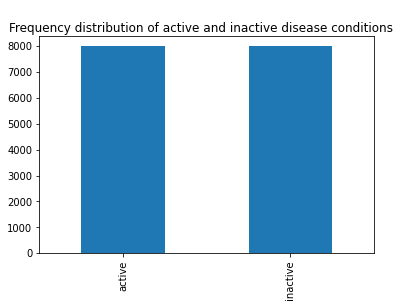

In [ ]:
import numpy as np
import matplotlib.pyplot as pyplot

fig = pyplot.figure()
fig.suptitle('\nFrequency distribution of active and inactive disease conditions')
merged['disease_condition'].value_counts().plot.bar()

Activity 1: Plot the same graph, but in the form of a 'line plot', 'scatter plot', 'pie plot', and a 'density plot'. Try using the 'groupby' function from pandas to plot the graph. Add a legend and title too.

Activity 2: Plot the frequency distribution of all the 26 plates in the 'merged' dataframe. Use any two plot types of your choice. The plates in the x axis should be in the increasing order.
Try plotting the same, using plot functions from matplotlib.

**Feature Extraction from an image**

First, we use scikit-image which is a library containing a collection of algorithms for image processing. We will use the methods imread and imshow to read an image, and display it.

((1024, 1024), <matplotlib.image.AxesImage at 0x7fa594ba5fd0>)

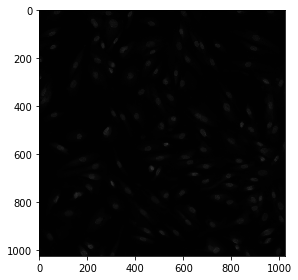

In [ ]:
import cv2
import numpy as np
from skimage.io import imread, imshow

image = imread('sample_data/E08_s2_w1.png') 
image.shape, imshow(image)

We will be discussing two methods for feature extraction.

**1. Raw Pixel Feature Vector**

The simplest way is to extract the raw pixel feature vector. The image shape here is 1024 x 1024. Hence, the number of features should be 1,048,576. We can generate this using the reshape function from NumPy where we specify the dimension of the image:

In [ ]:
features = np.reshape(image, (1024*1024))

features.shape, features

((1048576,), array([2, 1, 1, ..., 1, 1, 1], dtype=uint8))

The shape of the feature vector is (1048576, ). This is nothing but (1024*1024, ).

Now, let us consider a different method for feature extraction.


**2. Extracting Edge Features**

Consider two objects: a car and a bus. You can recognize the objects in an instant. What are the features that you considered while differentiating each of these images? The shape could be one important factor, followed by color, or size. What if the machine could also identify the shape as we do?

A similar idea is to extract edges as features and use that as the input for the model. Edge is basically where there is a sharp change in color. Look at the below image:


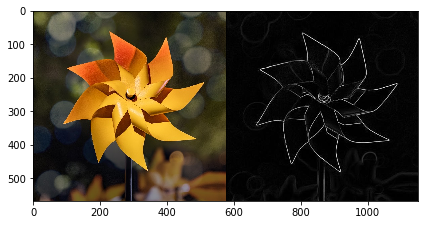

In [ ]:
image1 = imread('comp-biology-2020/edgedetection.png') 
imshow(image1)

The first image is the original image, and the second one contains the outlines for every object in the image. These are the edges in the image: basically boundaries between different image intensities.

We can see that the original image on the left has various colors and shades, while the “edges-only” representation on the right is black and white. If asked which image requires more data storage, I bet you would say the original image. And this makes sense; by detecting the edges of an image, we are doing away with much of the detail, thereby making the image “more lightweight”.
Thus, edge detection can be incredibly useful in cases where we don’t need to maintain all the intricate details of an image, but rather only care about the overall shape.

An image is represented in the form of numbers. Let us consider an image of a black square on a white background.

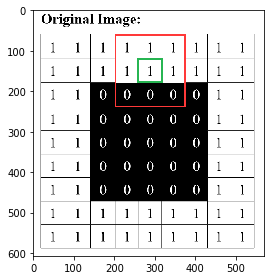

In [ ]:
image1 = imread('comp-biology-2020/pixel_workingimg.png') 
imshow(image1)

Above is a pixel-level representation of the image, where each pixel has a value between 0 (black) and 1 (white). Let us determine if the pixel in the green box is an edge or not. At first sight, we can say that it is an edge as there is a change in pixel intensity from 0 (the black region) to 1 (the white region in the green box). We can help the computer reach the same conclusion by using the neighbouring pixels.

Let’s take a small 3 x 3 box of local pixels centered at the green pixel in question. This box is shown in red. Then, let’s “apply” a filter to this little box. 

We multiply each pixel in the red box by each pixel in the filter element-wise. So, the top left pixel in the red box is 1 whereas the top left pixel in the filter is -1, so multiplying these gives -1. Each pixel in the result is achieved in exactly the same way.

The next step is to obtain the vertical score. We sum up the pixels in the result, giving us -4. Note that -4 is actually the smallest value we can get by applying this filter (since the pixels in the original image can be only be between 0 and 1). Thus, we know the pixel in question is part of a top vertical edge because we achieve the minimum value of -4. In the image below, 'Sum' refers to the 'Vertical Score'.

![alt text](https://drive.google.com/uc?id=1UfTCfQDgGfXZzj9rjVXSNBVY0upc--6D)

Activity 3 (i): Try out the same (on paper) by applying the filter on matrix from the bottom of the square. What value are you getting? Is it big enough to be declared an edge? 

How will you do the same to find a horizontal edge? Try taking the transpose of the vertical filter and apply this new filter to the image to derive the result, horizontal score and ultimately the horizontal edges.

Let us first test it out on a sample image of a puppy. We read the image, and convert it to grayscale.

((215, 320), <matplotlib.image.AxesImage at 0x7fa588ff0cf8>)

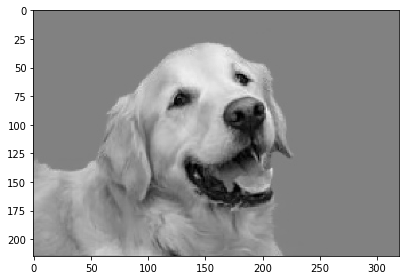

In [ ]:
puppy = imread('comp-biology-2020/pupper.jpg', as_gray=True) 
puppy.shape, imshow(puppy)

Instead of doing the math behind applying a filter to an image, there is an in-built function in skimage library to get the result directly after applying the prewitt vertical and horizontal filters, and display it.

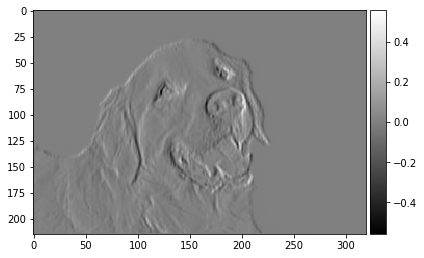

In [ ]:
from skimage.filters import prewitt_h,prewitt_v
from skimage import feature

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(puppy)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(puppy)

imshow(edges_prewitt_vertical, cmap='gray')

Display edges_prewitt_horizontal as well and observe the differences between the two results.

Now, let us obtain the same result if we code the math behind applying the filter to the image.

First read the image again without converting it to grayscale, Then, assign the Prewitt filter values (these are fixed values) for vertical and horizontal filters.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

puppy = imread('comp-biology-2020/pupper.jpg') 
#define the vertical filter
vertical_filter = [[-1,-2,-1], [0,0,0], [1,2,1]]

#define the horizontal filter
horizontal_filter = [[-1,0,1], [-2,0,2], [-1,0,1]]

#get the dimensions of the image
n,m,d = puppy.shape

Copy the original image into edges_img. We will be inserting our edge values into it one by one. Next, loop over the pixels in our original image: create a 3x3 box which is essentially a matrix considered in our original image, on which we will apply the filter. Then, multiply the vertical filter, and obtain the vertical score. Do the same for the horizontal filter. 

Now, in our example while studying how to apply a filter to an image, we only detected a single horizontal/vertical edge. In order to detect the horizontal edges, vertical edges, and edges that fall somewhere in between, we can combine the vertical and horizontal scores by calculating the Euclidean distance between them, and inserting this edge score into our image. This will give us the final result which we obtained in our previous example by directly using the in-built function.

In [ ]:
#initialize the edges image
edges_img = puppy.copy()

#loop over all pixels in the image
for row in range(3, n-2):
    for col in range(3, m-2):
        
        #create little local 3x3 box
        local_pixels = puppy[row-1:row+2, col-1:col+2, 0]
        
        #apply the vertical filter
        vertical_transformed_pixels = vertical_filter*local_pixels
        #remap the vertical score
        vertical_score = vertical_transformed_pixels.sum()/4
        
        #apply the horizontal filter
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        #remap the horizontal score
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        #combine the horizontal and vertical scores into a total edge score
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        
        #insert this edge score into the edges image
        edges_img[row, col] = [edge_score]*3

Normalize the values in the image, and display.

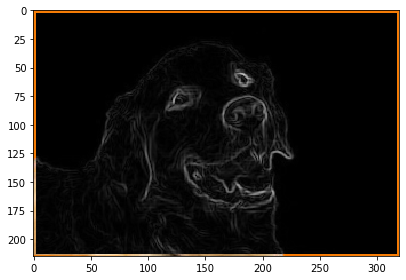

In [ ]:
#remap the values in the 0-1 range in case they went out of bounds
edges_img = edges_img/edges_img.max()
imshow(edges_img)

Activity 3: Extract the raw pixel feature vector for the set of images given in the directory 'test'. Think about how we can transform this feature vector back into the image. Try it out if you have any ideas.

Activity 4: Use the edge detection method we just discussed about, and extract the features for the same set of images from Activity 3. Use the inbuilt method for Prewitt filter in skimage, if interested use the detailed method.

Activity 5: For those who are interested in exploring this topic further, read about using Sobel Filters, and Canny filters as an alternative to the Prewitt filters we used above. Implement them if understood, and we can discuss the results tomorrow.

Note: Feature extraction will not be used in the following days, this i just to give an introduction to image processing using basic Computer Vision techniques.